# Aadhaar Enrolment Analysis – 2025

## Problem Statement

To analyze Aadhaar enrolment data to identify societal patterns, regional disparities, and age-group behaviour, and translate these findings into actionable insights that support inclusive and data-driven planning.

## Dataset Overview

The Aadhaar Enrolment dataset captures enrolment activity across India for the year 2025. The data is provided in three CSV files and includes location and age-group wise enrolment counts.

Key Columns:

date

state

district

pincode

age_0_5

age_5_17

age_18_greater

# Import Required Libraries

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load and Merge Datasets

In [7]:
file1 = "api_data_aadhar_enrolment_0_500000.csv"
file2 = "api_data_aadhar_enrolment_500000_1000000.csv"
file3 = "api_data_aadhar_enrolment_1000000_1006029.csv"


# Read CSV files
df1 = pd.read_csv(file1)
df2 = pd.read_csv(file2)
df3 = pd.read_csv(file3)


# Merge into single dataframe
df = pd.concat([df1, df2, df3], ignore_index=True)


df.shape

(1006029, 7)

# Data Cleaning and Feature Engineering

In [10]:
# Convert date column
df['date'] = pd.to_datetime(df['date'], errors='coerce')


# Extract month
df['month'] = df['date'].dt.month


# Create total enrolment column
df['total_enrolment'] = (
df['age_0_5'] + df['age_5_17'] + df['age_18_greater']
)


# Drop missing values
df = df.dropna()

## Data Scope Confirmation

In [13]:
df['date'].dt.year.unique()

array([2025], dtype=int32)

The dataset contains enrolment records only for the year 2025. Therefore, the analysis focuses on intra-year (month-wise) patterns rather than multi-year trends.

# State-wise Aadhaar Enrolment Analysis

In [18]:
state_enrolment = (
df.groupby('state')['total_enrolment']
.sum()
.reset_index()
.sort_values(by='total_enrolment', ascending=False)
)

In [20]:
# Visualization: Top 10 states
top10 = state_enrolment.head(10)

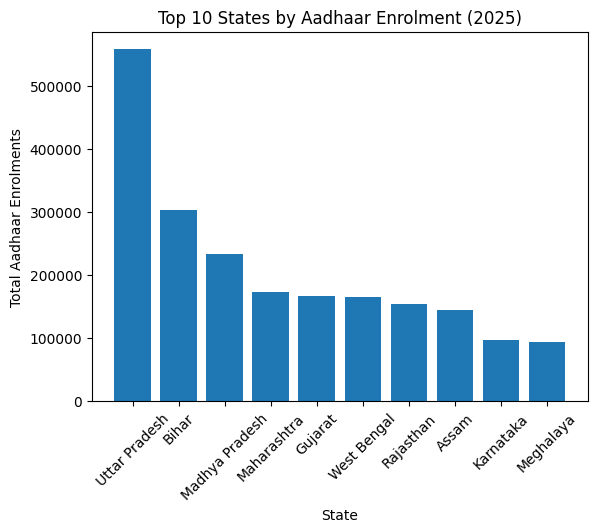

In [22]:
plt.figure()
plt.bar(top10['state'], top10['total_enrolment'])
plt.xticks(rotation=45)
plt.xlabel("State")
plt.ylabel("Total Aadhaar Enrolments")
plt.title("Top 10 States by Aadhaar Enrolment (2025)")
plt.show()

Higher enrolment volumes in economically active states suggest population concentration and migration-driven demand for Aadhaar services.

# Month-wise Aadhaar Enrolment Trend (2025)

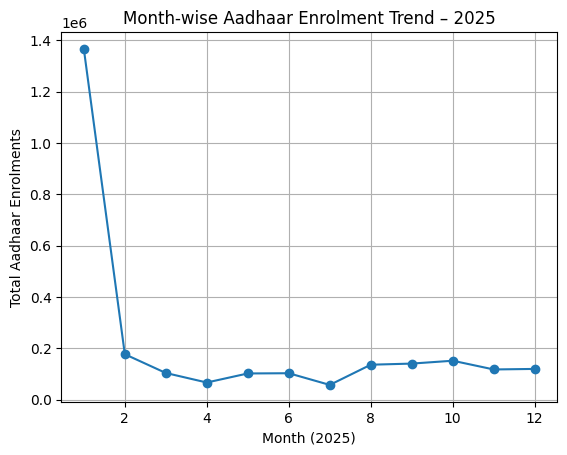

In [26]:
monthly_enrolment = (
df.groupby('month')['total_enrolment']
.sum()
.reset_index()
.sort_values('month')
)


plt.figure()
plt.plot(monthly_enrolment['month'], monthly_enrolment['total_enrolment'], marker='o')
plt.xlabel("Month (2025)")
plt.ylabel("Total Aadhaar Enrolments")
plt.title("Month-wise Aadhaar Enrolment Trend – 2025")
plt.grid(True)
plt.show()

Seasonal fluctuations in enrolment indicate campaign-driven or administrative demand rather than uniform enrolment throughout the year.

# Age-group Analysis (Key Societal Indicator)

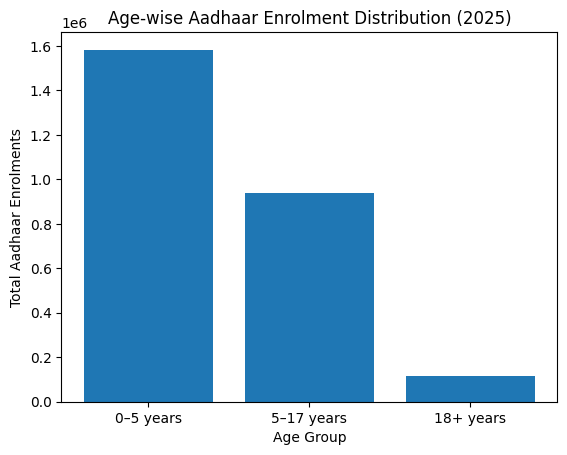

In [32]:
age_totals = pd.DataFrame({
'Age Group': ['0–5 years', '5–17 years', '18+ years'],
'Total Enrolment': [
df['age_0_5'].sum(),
df['age_5_17'].sum(),
df['age_18_greater'].sum()
]
})


plt.figure()
plt.bar(age_totals['Age Group'], age_totals['Total Enrolment'])
plt.xlabel("Age Group")
plt.ylabel("Total Aadhaar Enrolments")
plt.title("Age-wise Aadhaar Enrolment Distribution (2025)")
plt.show()

The majority of Aadhaar enrolments in 2025 are concentrated in the 0–5 and 5–17 age groups, indicating strong early-life and school-age identity inclusion, while relatively low enrolment in the 18+ group suggests that Aadhaar coverage among adults is largely saturated.

# District-level Enrolment Disparities

In [39]:
district_enrolment = (
df.groupby(['state', 'district'])['total_enrolment']
.sum()
.reset_index()
)


# Top and bottom districts
top_districts = district_enrolment.sort_values('total_enrolment', ascending=False).head(10)
bottom_districts = district_enrolment.sort_values('total_enrolment').head(10)


top_districts

,state,district,total_enrolment
159,Bihar,Sitamarhi,31073
877,Uttar Pradesh,Bahraich,28340
555,Maharashtra,Thane,25196
574,Meghalaya,East Khasi Hills,24847
386,Karnataka,Bengaluru Urban,22590
950,Uttar Pradesh,Sitapur,20866
383,Karnataka,Bengaluru,18473
944,Uttar Pradesh,Shahjahanpur,18015
867,Uttar Pradesh,Agra,17949
868,Uttar Pradesh,Aligarh,17788


In [41]:
 bottom_districts

,state,district,total_enrolment
1026,andhra pradesh,rangareddi,1
165,Chandigarh,Rupnagar,1
279,Haryana,Jhajjar *,1
62,Arunachal Pradesh,Leparada,1
309,Jammu & Kashmir,Anantnag,1
313,Jammu & Kashmir,Kargil,1
314,Jammu & Kashmir,Rajauri,1
315,Jammu & Kashmir,Srinagar,1
424,Karnataka,Udupi *,1
567,Manipur,Pherzawl,1


# Anomaly Detection (Spikes and Dips)

In [ ]:
monthly_enrolment.sort_values('total_enrolment')